## Graphics

This is a sample for plotting with R.

In [1]:
library(quantmod)
# initialization
symbols = c("AMZN", "FB", "NFLX", "MSFT")
start <- as.Date("2017-01-01")
end <- as.Date("2020-01-01")
getSymbols(Symbols = symbols, src = "yahoo", from = start, to = end)
# get only Close values of AMZN and MSFT symbols
stocks <- as.xts(data.frame(AMZN = AMZN[,"AMZN.Close"], MSFT = MSFT[,"MSFT.Close"]))

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "AMZN" "FB"   "NFLX" "MSFT"

Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




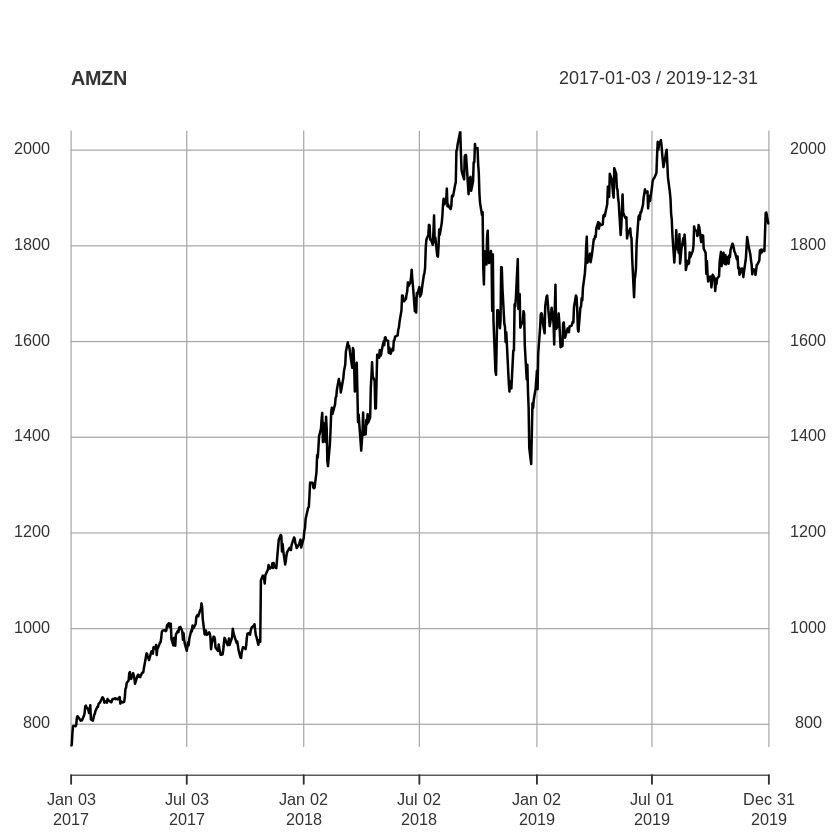

In [2]:
# plotting
library(plotly)
plot(AMZN[,"AMZN.Close"], main = "AMZN") # prints linear graph

In [3]:
# create a custom theme
my_theme <- chart_theme()
my_theme$col$up.col <- "darkgreen"
my_theme$col$up.border <- "black"
my_theme$col$dn.col <- "darkred"
my_theme$col$dn.border <- "black"
my_theme$rylab <- FALSE
my_theme$col$grid <- "lightgrey"

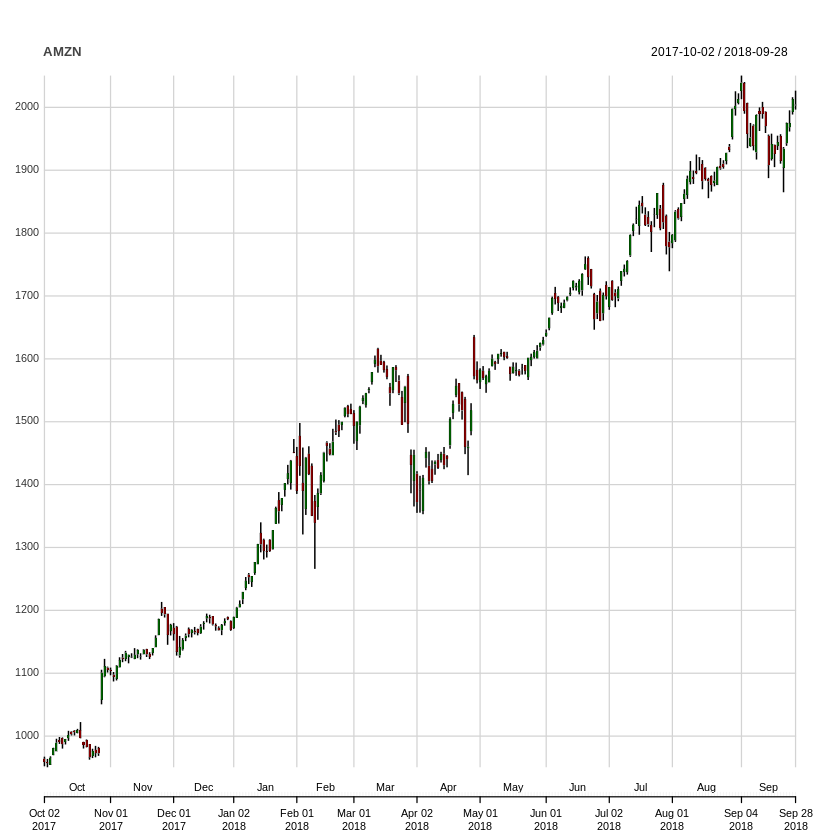

In [4]:
# using the custom theme with a range
chart_Series(AMZN, subset = "2017-10::2018-09", theme = my_theme)

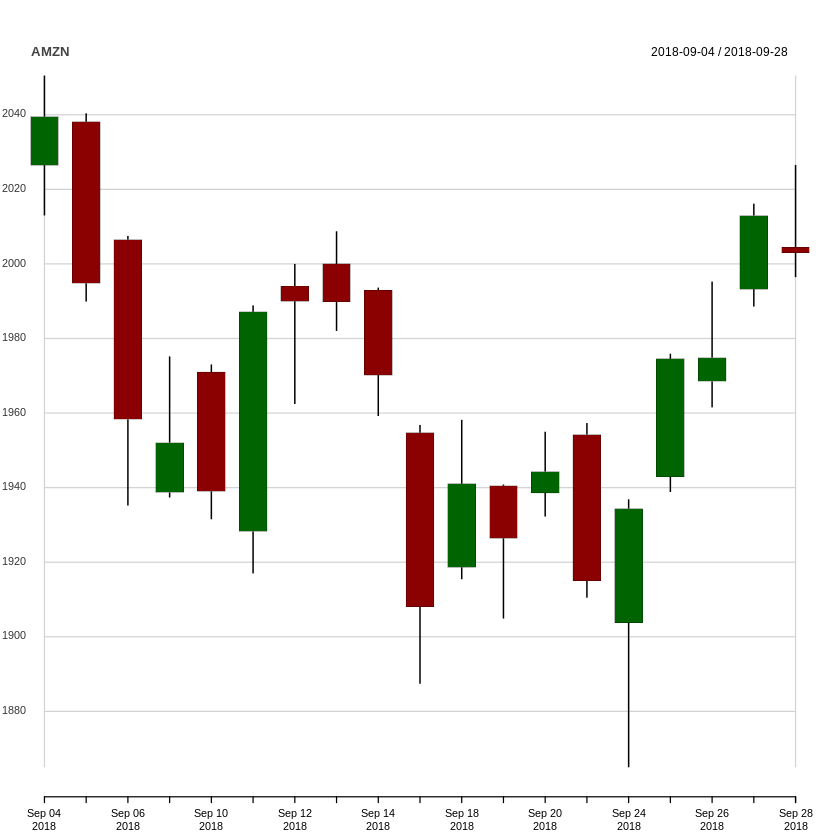

In [5]:
# using the custom theme with a range of one month
chart_Series(AMZN, subset = "2018-09", theme = my_theme)

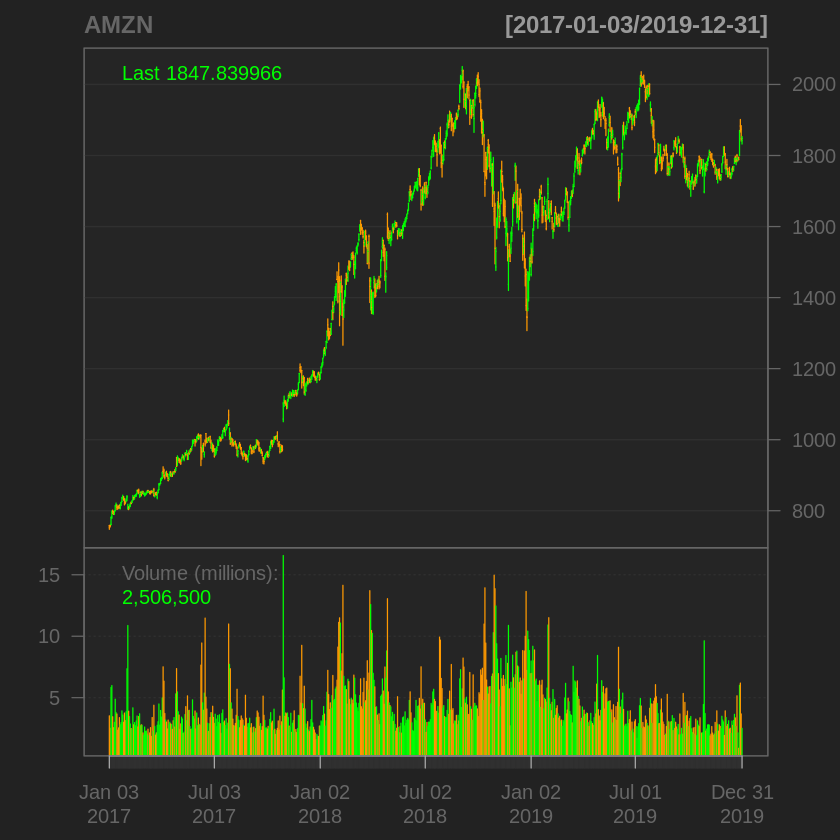

In [6]:
# using the black theme of quantmod
barChart(AMZN, theme = chartTheme('black'))

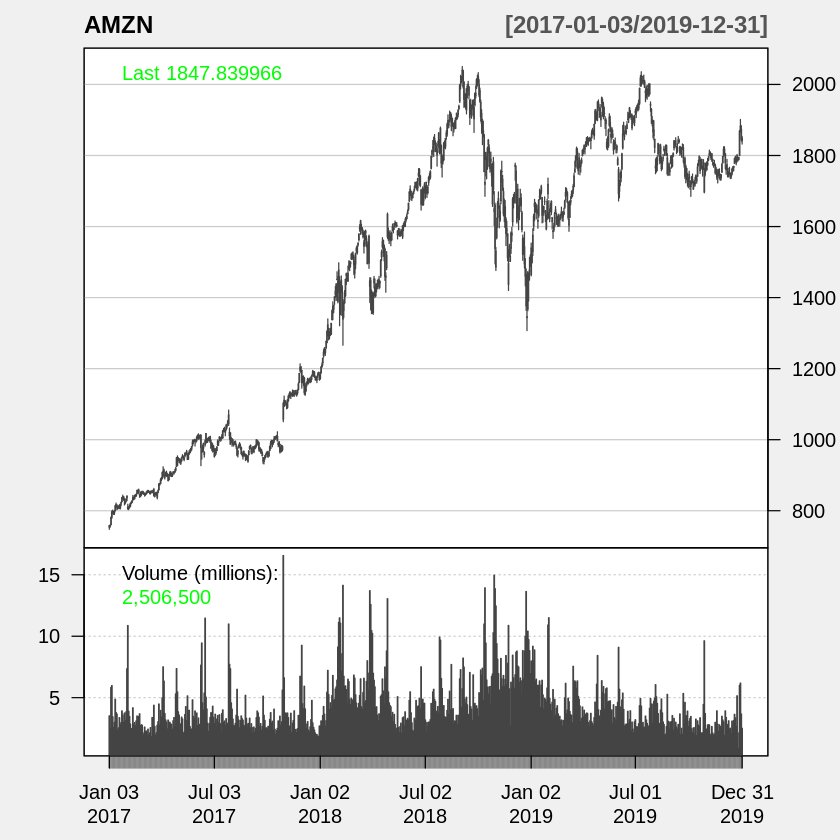

In [7]:
# using the candle theme of quantmod
candleChart(AMZN, up.col = "green", dn.col = "red", theme = "white") 

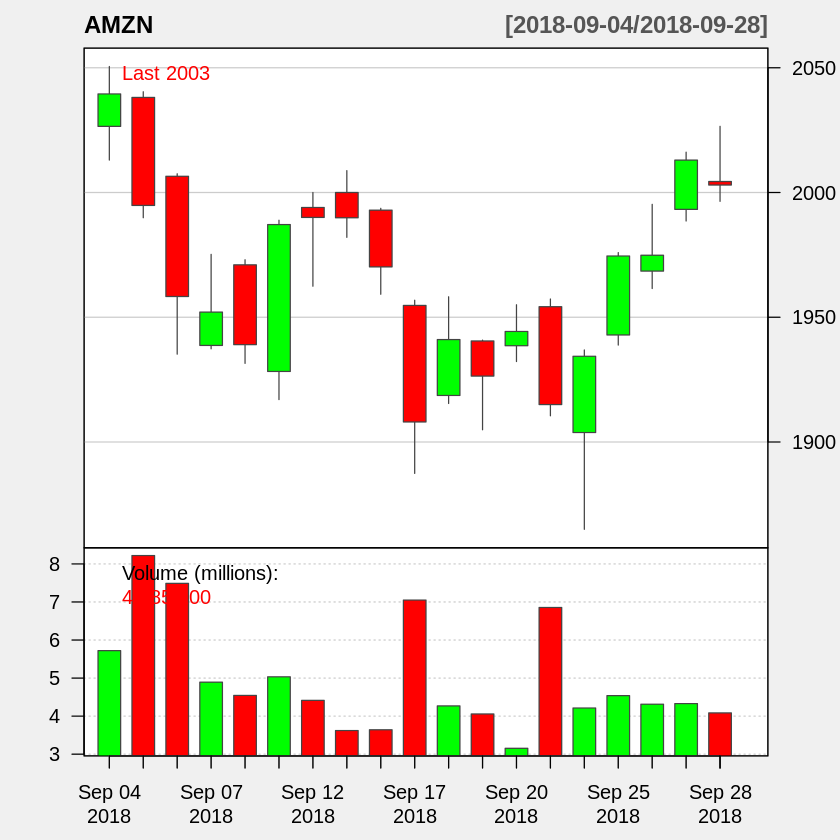

In [8]:
# zoom of graph on one month
zoomChart("2018-09")

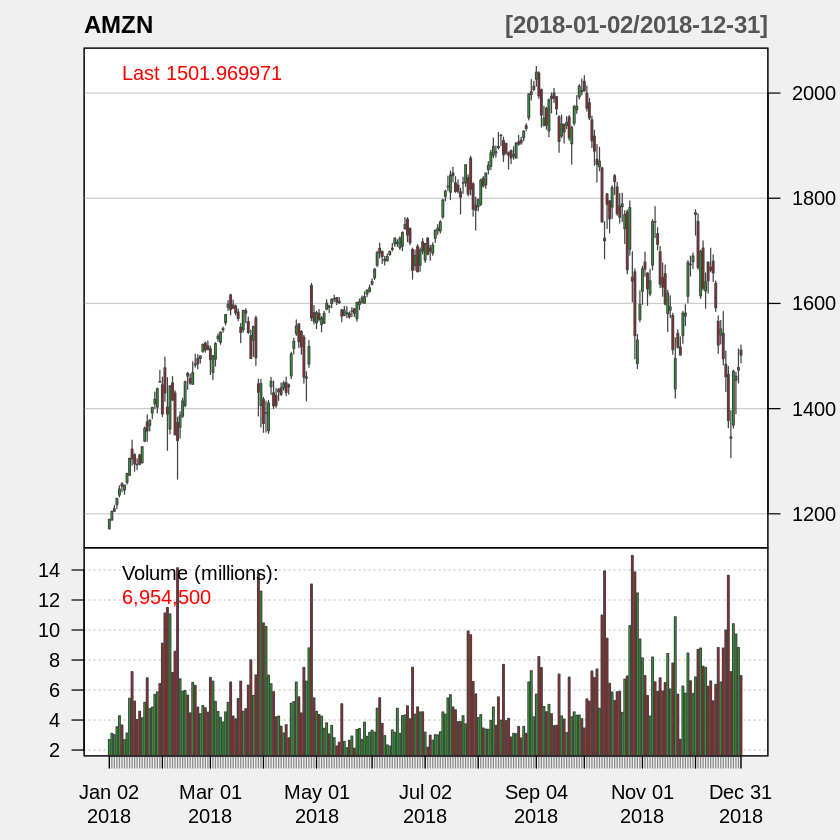

In [9]:
# zoom of graph on one year
zoomChart("2018")

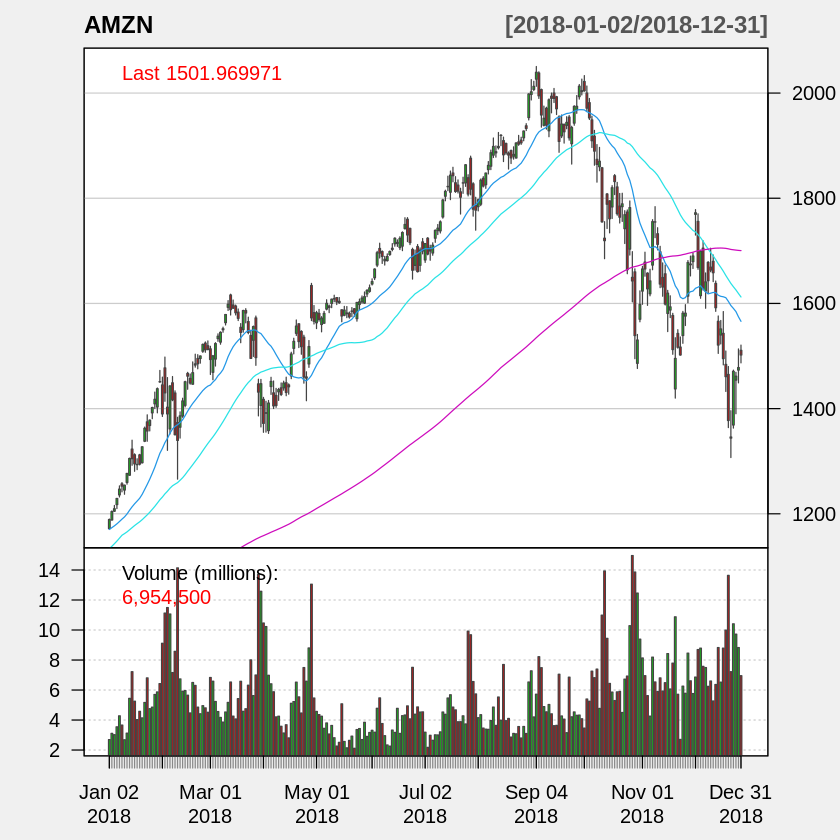

In [10]:
# add indicators
addSMA(n = c(20, 50, 200)) # adds simple moving averages

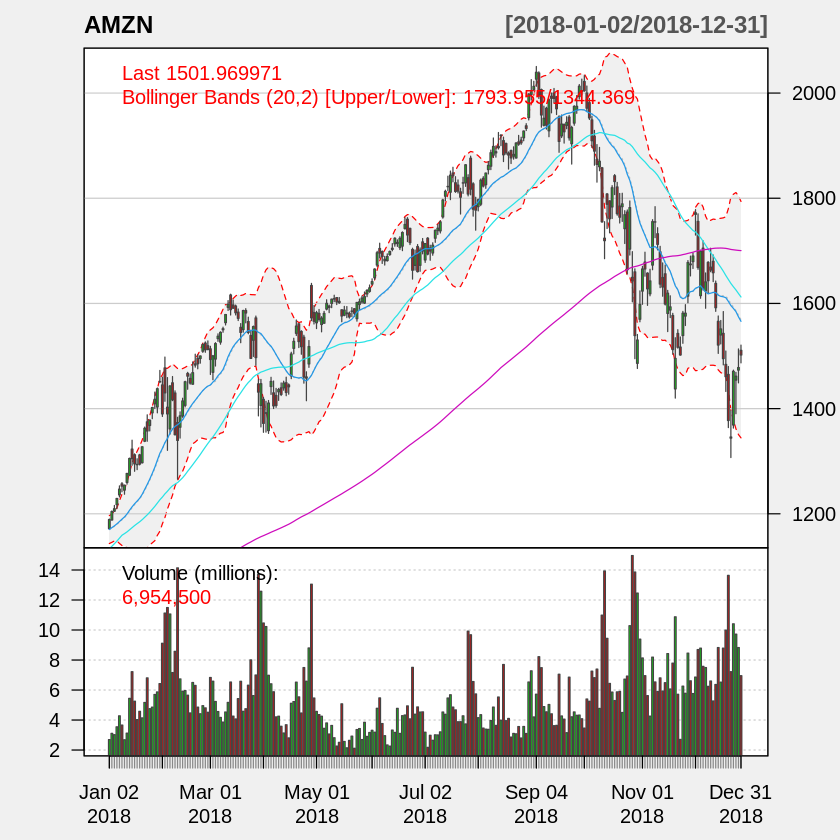

In [11]:
addBBands(n = 20, sd = 2, ma = "SMA", draw = "bands", on = -1) # sd = standard deviation, ma = average

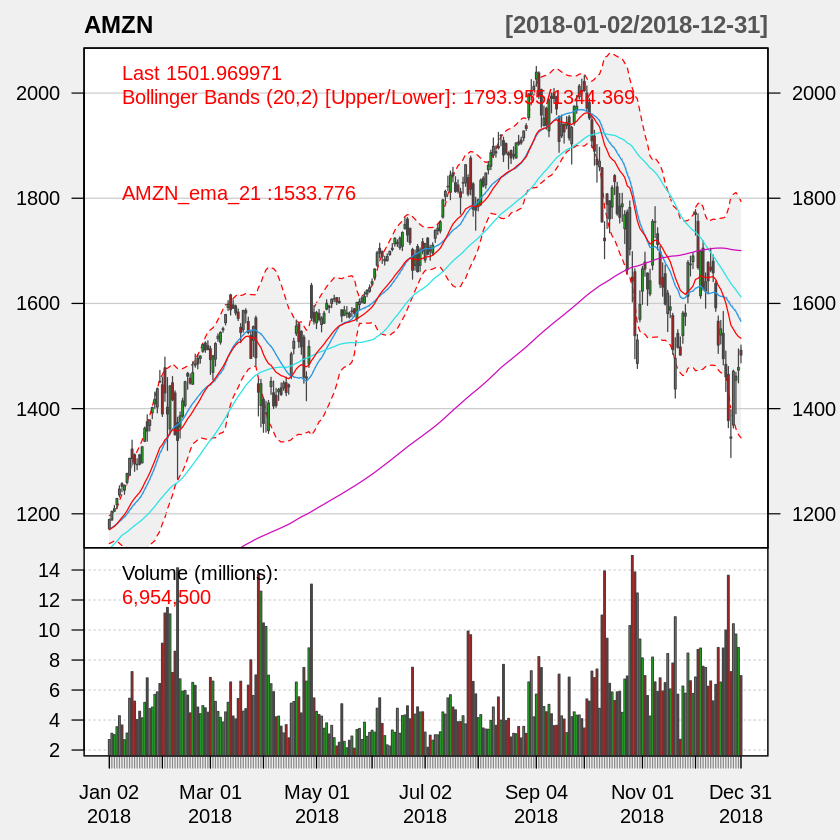

In [12]:
AMZN_ema_21 <- EMA(Cl(AMZN), n=21) # exponencial moving average
addTA(AMZN_ema_21, on = 1, col = "red")

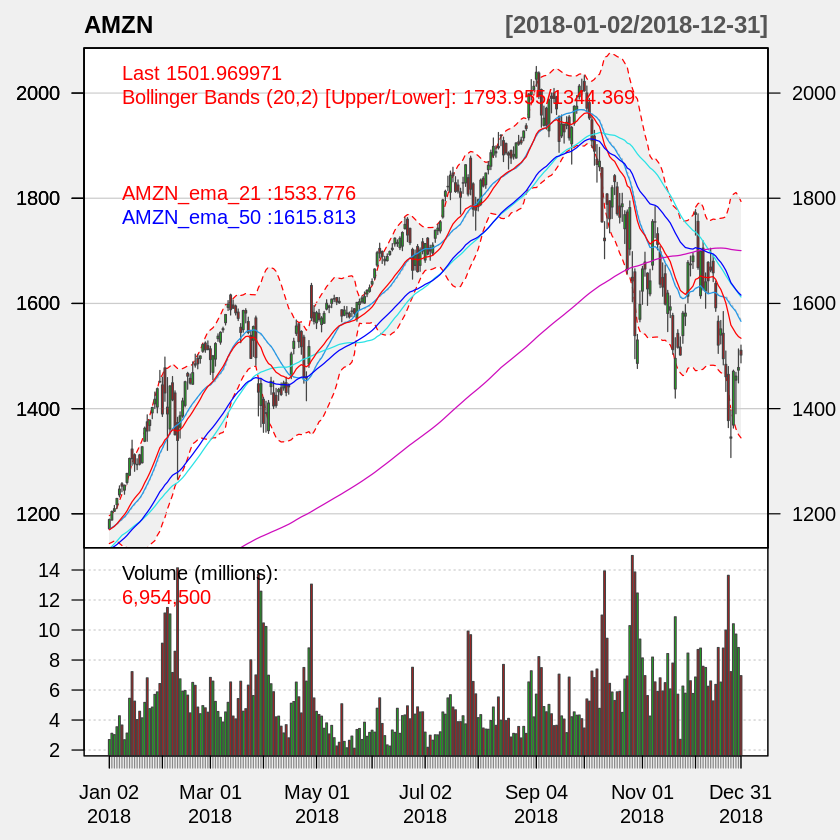

In [13]:
AMZN_ema_50 <- EMA(Cl(AMZN), n=50) # exponencial moving average
addTA(AMZN_ema_50, on = 1, col = "blue")

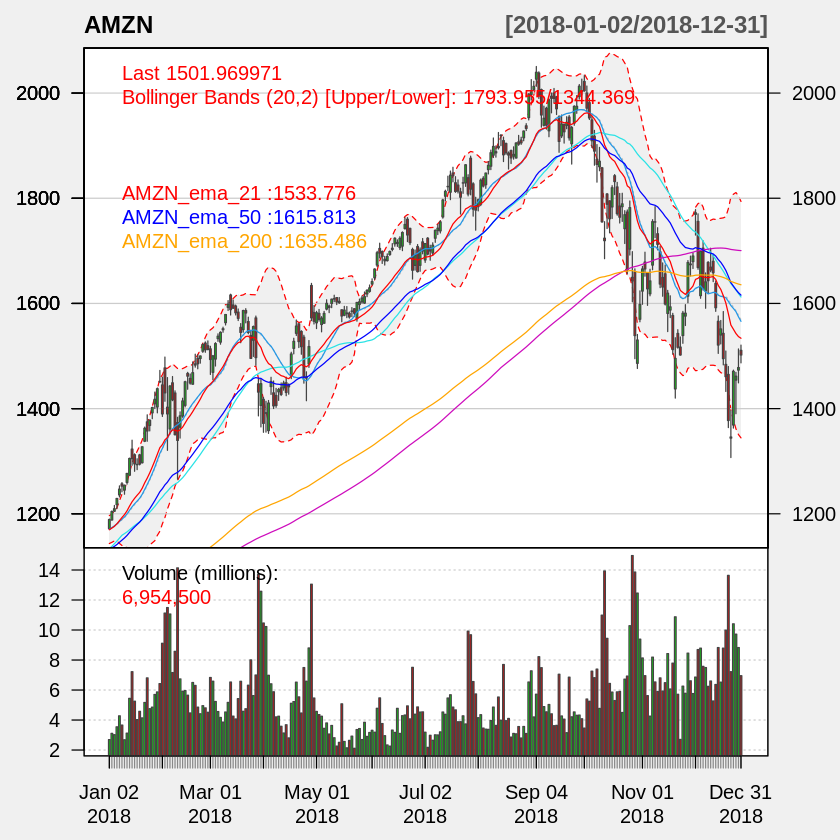

In [14]:
AMZN_ema_200 <- EMA(Cl(AMZN), n=200) # exponencial moving average
addTA(AMZN_ema_200, on = 1, col = "orange")

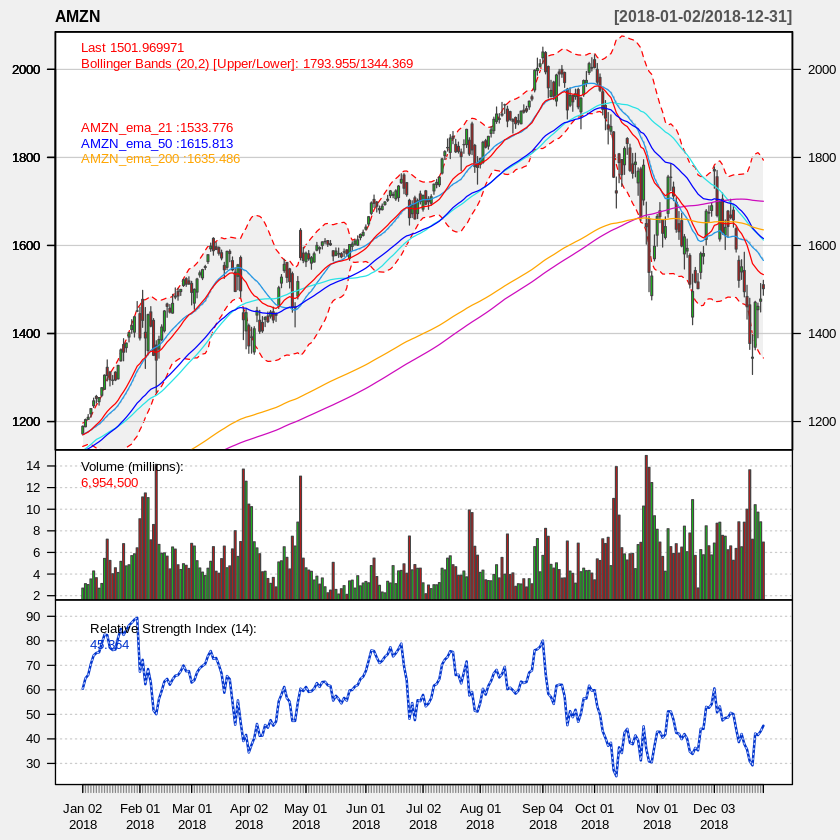

In [15]:
addRSI(n = 14, maType = "EMA", wilder = TRUE) # relative strength index